In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {
    "Size in Feet": [1500, 2000, 1200, 2500, 1800, 1600],
    "Number of Bedrooms": [5, 4, 2, 5, 3, 3],
    "Number of Floors": [2, 2, 1, 3, 2, 1],
    "Age of House (years)": [10, 5, 15, 8, 12, 20],
    "Price in $1000": [300, 450, 200, 600, 350, 280]
}

# Create a DataFrame
df = pd.DataFrame(data)

<p style="text-align: center;"><b>Sample Table</b></p>

| Size in Feet | Number of Bedrooms | Number of Floors | Age of House (years) | Price in $1000 |
|--------------|--------------------|------------------|----------------------|----------------|
| 1500         | 3                  | 2                | 10                   | 300            |
| 2000         | 4                  | 2                | 5                    | 450            |
| 1200         | 2                  | 1                | 15                   | 200            |
| 2500         | 5                  | 3                | 8                    | 600            |
| 1800         | 3                  | 2                | 12                   | 350            |
| 1600         | 3                  | 1                | 20                   | 280            |

#### Notations:
- $ x_j = j^{th} feature $
- $ n =$ number of features
- $\vec{x}^{(i)} = $ feature of $i^{th}$ training example
- $x_j^{(i)} = $ value at $i^{th}$ index of $j^{th}$ feature 
$$Here,\ j = 1,2,...,n.\ where,\ n = 4 $$ 

#### For example:
- $\vec{x}^{(2)}$ = [2000 4 2 5]
- $x_3$ = feature 'Number of Floors'
- $x_3^{(2)} = $ 2

### Model: 
$$f_{w_1,w_2,...w_n,b}(x_1,x_2,...x_n)= \hat{y} = w_1x_1 + w_2x_2 +.....w_nx_n +b$$


- writing all the $n$ features and $n$ parameters in vector form
  $$f_{\vec{w},b}(\vec{x}) = \vec{w}.\vec{x}^{(i)} +b$$
  $$ here,\ \vec{w}.\vec{x} \textrm{ is the dot product}$$
  
$$ x = [x_1^{(i)} x_2^{(i)} .... x_j^{(i)}] $$
$$ w = [w_1 w_2 .... w_j] $$

> <b>NOTE:</b> This is a multiple linear regression not a multivariate linear regression



### Vectorization
- vectorization makes the code run faster and using parallel processor
- rather than looping in the `range(n)` for $w$ and $x$ we use numpy `np.dot(vec1, vec2)` for dot product between two vectors

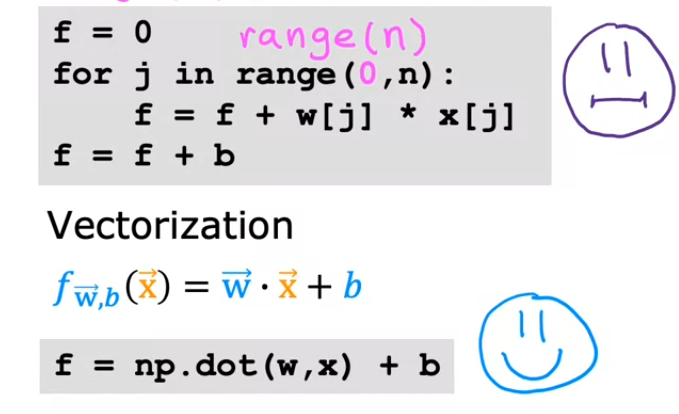

# Gradient Descent
- Model :  $f_{\vec{w},b}(\vec{x}) = \vec{w}.\vec{x} +b$
- Cost Function : $$J(\vec{w},b) = \frac{1}{2m} \sum_{i=1}^{m}(f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})^2$$
- Gradient Descent :
  
  $$ \textrm{repeat until convergence} \{ $$
  $$ w_j = w_j - \alpha \frac{\partial}{\partial w_j}J(\vec w, b)$$
  $$ b = b - \alpha \frac{\partial}{\partial b}J(\vec w, b)$$
  $$ \} $$

    - Since $j = 1,2,3...n$ the calculation of $w_j$ is given as:
    $$\textrm{For } j=1$$
      $$ w_1 = w_1 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f_{\vec w,b} (\vec x^{(i)}) - y^{(i)})x_1^{(i)}$$
      $$\textrm{Since,} $$
      $$ \frac{\partial}{\partial w_1}J(\vec w, b) = \frac{1}{m}\sum_{i=1}^{m}(f_{\vec w,b} (\vec x^{(i)}) - y^{(i)})x_1^{(i)}$$
  - For b
      $$ b = b - \alpha \frac{1}{m} \sum_{i=1}^{m}(f_{\vec w,b} (\vec x^{(i)}) - y^{(i)})$$

# Feature scaling:
- Here in the data frame `df` the 'Size in Feet' is relatively large in values as comapred to 'Number of Bedrooms'
- In such condition it is appropriate to choose high parameter value for small data and small parameter value for large data
- for context, let $w_1$ and $w_2$ be the parameter for $x_1$ = 'Size in Feet' and $x_2$ = 'Number of Bedrooms'
$$y=w_1x_1 + w_2x_2 + b$$
- here choosing $w_1 = 0.1 \ and\ w_2 = 40 \ and\ b = 30$ would give appropriate $y$ i.e $y = 300$ (other features are ignored for the example)
$$0.1\times1500 + 40\times3 + 30 = 300 = y$$

### <u>How feature scaling helps in gradient descent</u>
- if the $x-axis$ and $y-axis$ in the plot are around the center of graph this shows the scaling of features are common (meaning there is no comparatively very large and very small data in the features)
- This allows the cost function $J(\vec w, b)$ to take cleaner steps towards minimum thus is faster.
- The unscaled features makes cost function to jumps high and low before reaching minimum
- For reference look at the plots below how feature scaling differs to non-relative data features, the contour plot is more elliptic, scatter plots are at the bottom of graph in non-scaled features
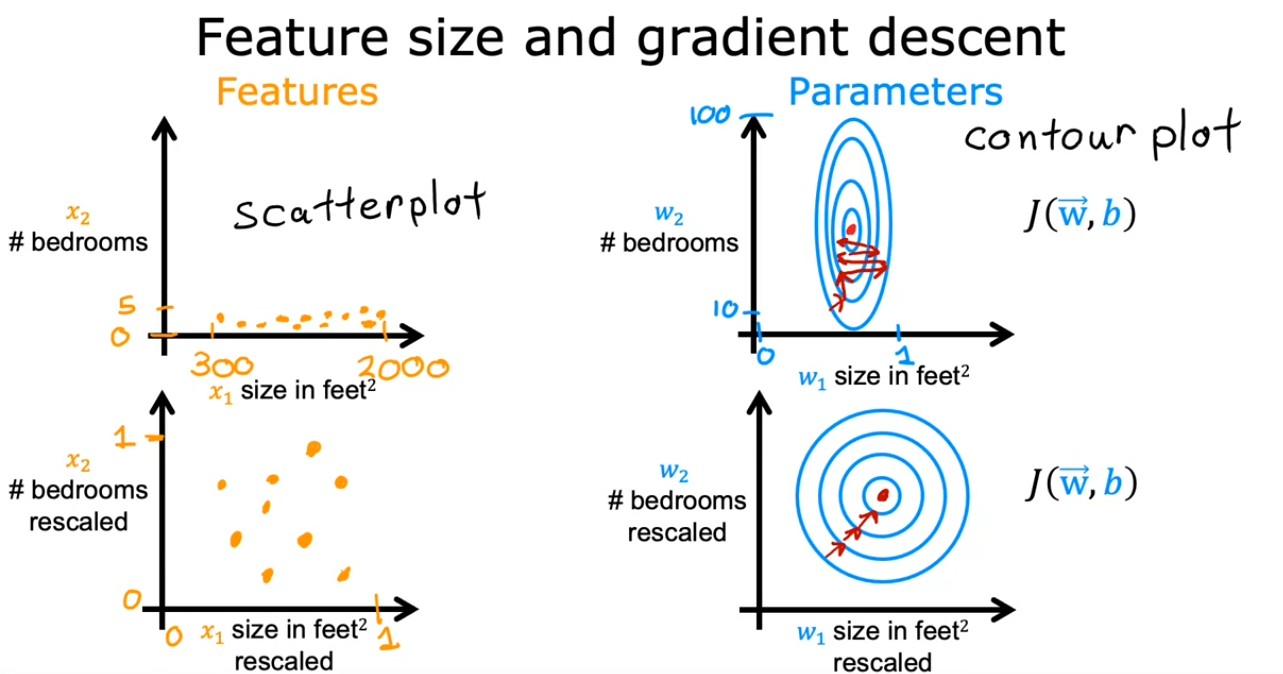

## Implementing Feature Scaling

- <u>Dividing by maximum</u>
    - For example, if a feature ranges from $1$ to $2000$, $(1\le x_1 \le 2000)$ then
      $$ x_{1,scaled} = \frac{x_1}{2000} $$
      $$ where,\ [0,1)\ \le x_{1,scaled} \le 1\ \ i.e.\ x_{1,scaled}\ ranges\ from\ 0\ to\ 1 $$

- <u>Mean normalization</u>
    - For a feature $x_1$ calculating its mean $(\mu_1)$ then
      $$x_{1,scaled} = \frac{x_1 - \mu_1}{x_{1,max} - x_{1,min} }$$
      $$here\ x_{1,scaled}\ ranges\ from -1\ to\ 1$$
- <u>Z-score normalization</u>
    - For a feature $x_1$ calculating its mean $(\mu_1)$ and standard deviation $(\sigma_1)$ then
      $$x_{1,scaled} = \frac{x_1 - \mu_1}{\sigma_1}$$

- Calculation of mean and standard deviation
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

<p style="text-align: center"><u>When should I rescale a feature</u></p>
        

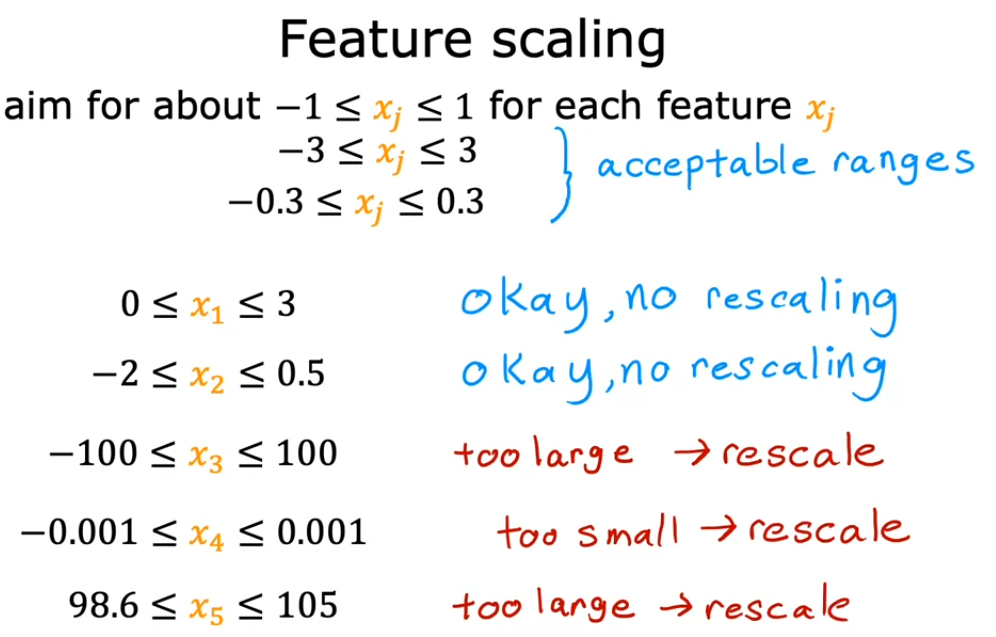


# Making sure gradient is working correctly
- Remember the objective is to minimize $J(\vec w, b)$
- $J(\vec w,b)$ should decrease afer iteration
- To examine this we can plot number of iteration vs $J(\vec w, b)$ (a single iteration is when we simultaneously update the parameters)
- In the figure below, $J(\vec w,b)$ takes very smaller steps after $300$ iterations and flats out after around $400$
- Choosing a right threshold $\varepsilon$ `epsilon` is difficult therefore it is relevant to examine the curve of $J(\vec w, b)$ vs number of iterations

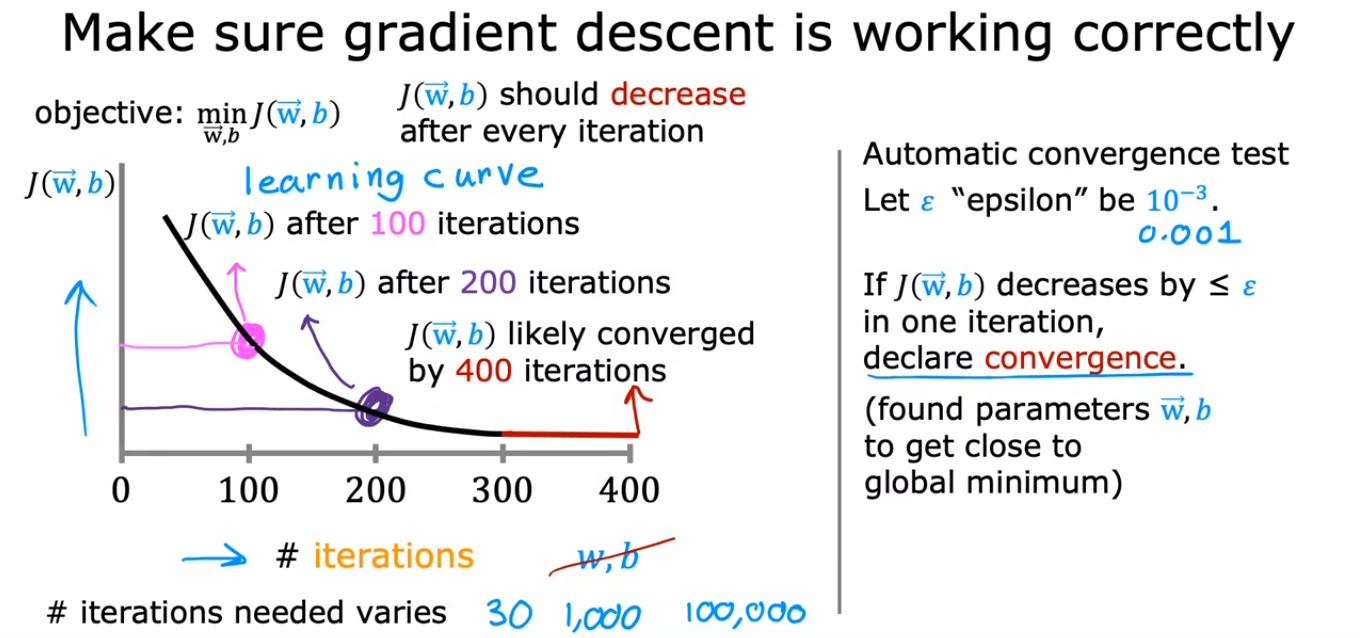



# Learning rate $\alpha$:
- while choosing learning rate choose as: $$[...\quad 0.0001\quad 0.001\quad 0.01\quad 0.1\quad 1\quad ...]$$
- for a particular learning rate see the plot between $J(\vec w, b)$ vs number of iterations as mentioned in the topic above
- find the smallest and largest learning rate by heat and trial (see the curve) and from the smallest, increase the learning rate by 3 times to see the curve again.. it flats out from certain point if it is converging

- Perform these two steps to find appropriate learning rate
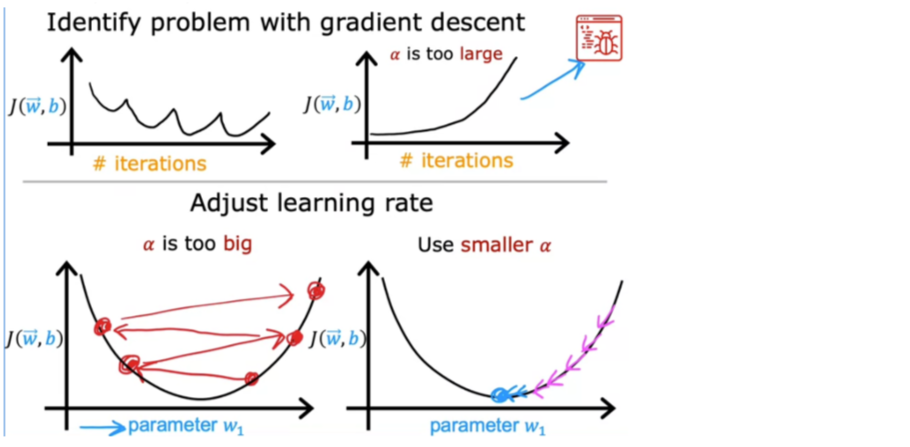

# Feature engineering:
- For example, when a dataset is given with the length and width of a land the price may vary based on length and width. In the context if taken only length and width into consideration the land of length: $5\ feet$, width: $10\ feet$ would cost same for lenght:$10\ feet$, width: $5\ feet$. It seems bad to predict price based on length and width only because land with maximum length(frontage) will always have high prices.
- Thus in such case we may consider a new custom feature as area calculated as: $length \times width $

## Polynomial Regression
- Feature scaling and feature engineering is more important in case of polynomial regression
- For a training set having non-linear data point we may need a model with heigher degree polynomial that fits the data set. In such case we calculate different versions of a features as a new custom features

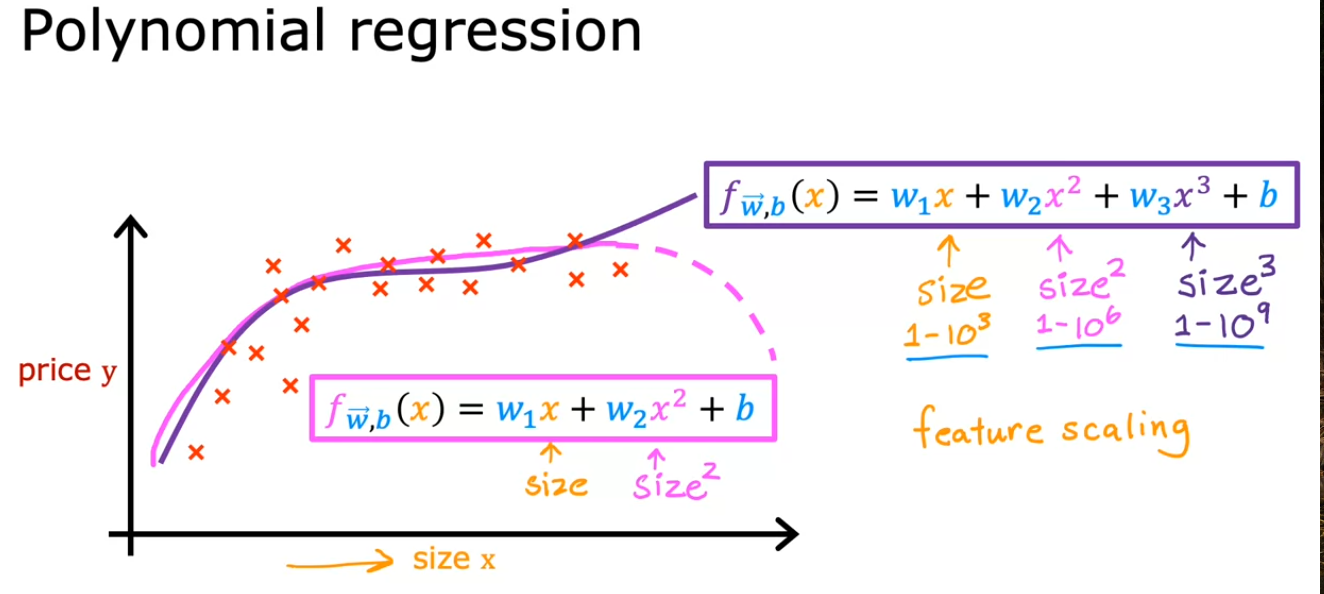

- In the image, the $x$ is further calculated to $x^2$ and $x^3$ to create a model that fits the data points